In [1]:
ROOT_EXAMPLE_FILE = "public_train_10000.root"

# Read the data
* Here we repeat the exact same code as in root_numpy tutorial

In [2]:
import root_numpy
import numpy as np
data = root_numpy.root2array(ROOT_EXAMPLE_FILE)

In [3]:
# get field names. Not the most comfortable way. We'll deal with it later.
columns = data.dtype.names
print columns

('event_id', 'target', 'lepton_pt', 'lepton_eta', 'lepton_phi', 'mem_pt', 'mem_phi', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', 'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb')


In [4]:
#take a column
data["lepton_pt"]

array([  34.75056839,   54.25092697,   47.74602509, ...,  103.45240784,
         33.85595703,   50.13303757], dtype=float32)

# Visualizing with matplotlib
Matplotlib is a library for data visualiztion.

It features quick and simple interfaces for basic problems (e.g. plot histogram) while still allowing for full customization on demand.

In this notebook we shall cover common use cases applied to HEP data we have just loaded

In [5]:
# import the library
import matplotlib.pyplot as plt
# display plots right inside notebook (not in a popup window)
%matplotlib inline

# Line plot

* You provide X and Y of points, matplotlib connects them in a line

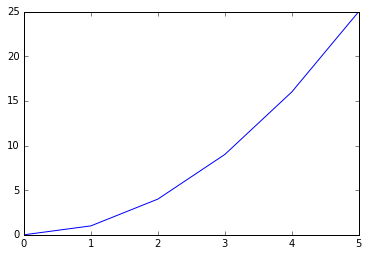

In [6]:
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25])


One use case is displaying empirical CDF of a variable
* We use plt.axes() to display several curves on a single plot
* This is also possible for other matplotlib functions.

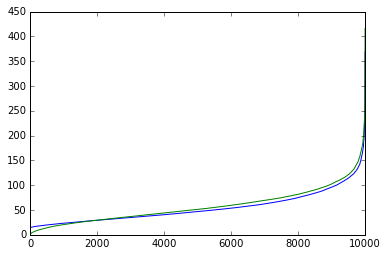

In [15]:
#a range of numbers from 1 to N as X axis
x = range(len(data))

# 3rd column = lepton_pt
y1 = sorted(data['lepton_pt'])
# 5th column = mem_pt
y2 = sorted(data['mem_pt'])

ax = plt.axes()
ax.plot( x, y1 )
ax.plot( x, y2 )

# Do It Yourself
Following the example above, plot similar quasi-Cumulative Distribution Functions over the following variables
 * lepton eta
 * jet1_eta
 * jet2_eta


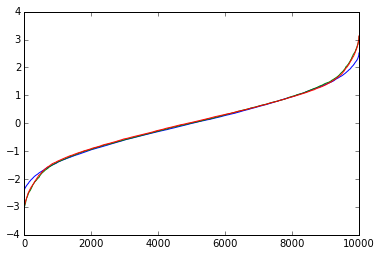

In [7]:
#make up a code similar to one above in order to compare CDFs for 'eta's 
#a range of numbers from 1 to N as X axis
x = range(len(data))

# 3rd column = lepton_pt
y1 = sorted(data['lepton_eta'])
# 5th column = mem_pt
y2 = sorted(data['jet1_eta'])
y3 = sorted(data['jet2_eta'])

ax = plt.axes()
ax.plot( x, y1 )
ax.plot( x, y2 )
ax.plot( x, y3 )

# Scatter plot

* Takes X and Y just like .plot, but does not connect the dots with lines.
* Useful to explore data structure
* Note that plots can also have some customizations: color, opacity, title, etc.
  * Press shift+Tab with text cursor on a function to see details
  * for more information, press shift+Tab+Tab and so on

In [16]:
x = data['lepton_pt']
y = data['lepton_eta']
color = data['target']

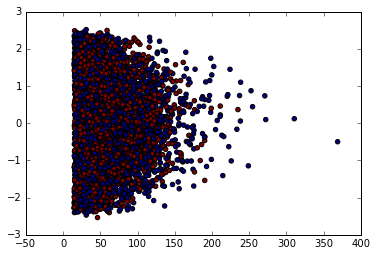

In [17]:
# A terrible plot
plt.scatter(x,y, c = color)

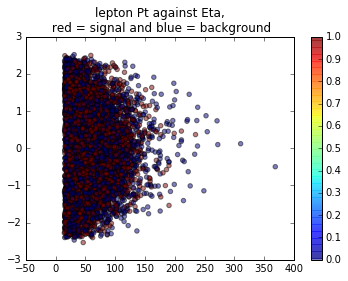

In [18]:
# A better plot with title and colorbar
plt.title("lepton Pt against Eta,\n red = signal and blue = background")
plt.scatter(x,y,
            c = color,
            alpha = 0.5)
plt.colorbar()

(10, 400)

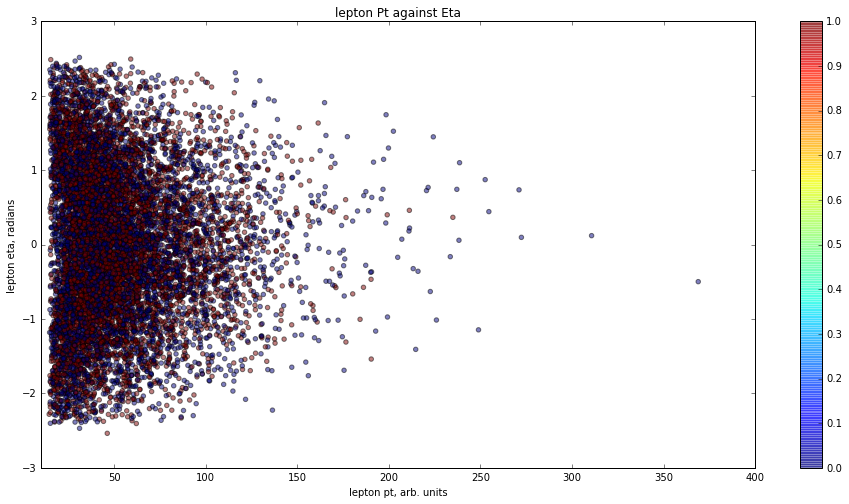

In [19]:
# An even better (or worse) plot

#set figure size
plt.figure(figsize=[16,8])

plt.title("lepton Pt against Eta")
plt.scatter(x,y,
            c = data['target'],
            alpha = 0.5)
plt.colorbar()

#set axis labels
plt.xlabel('lepton pt, arb. units')
plt.ylabel('lepton eta, radians')

#set axis limits
plt.xlim(10,400)



# Do It Yourself
Create a scatter-plot of jet1_pt against jet2_pt.

Your plot must contain axis labels and a title, because HEP.

(10, 400)

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


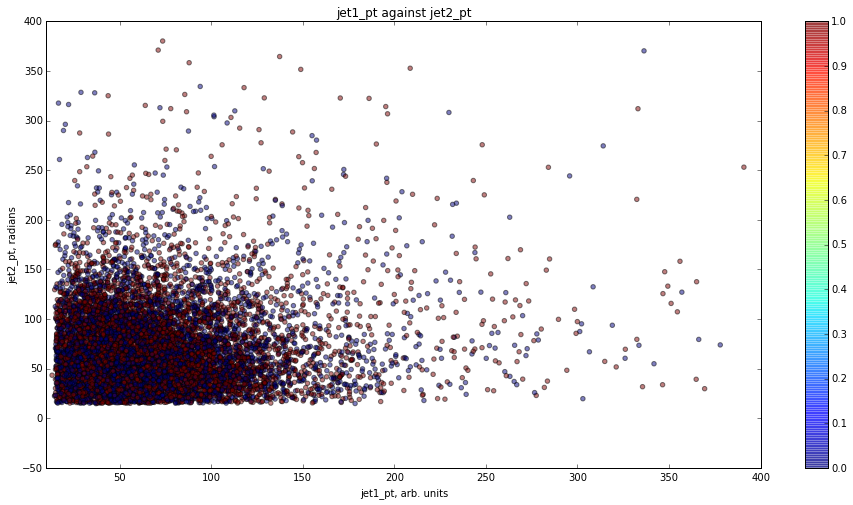

In [9]:
# An even better (or worse) plot
a = data['jet1_pt']
b = data['jet2_pt']
color = data['target']
#set figure size
plt.figure(figsize=[16,8])

plt.title("jet1_pt against jet2_pt")
plt.scatter(a,b,
            c = data['target'],
            alpha = 0.5)
plt.colorbar()

#set axis labels
plt.xlabel('jet1_pt, arb. units')
plt.ylabel('jet2_pt, radians')

#set axis limits
plt.xlim(10,400)

# Histogram
* just a regular 1-dimensional or 2-dimensional histogram
* bins is an important parameter

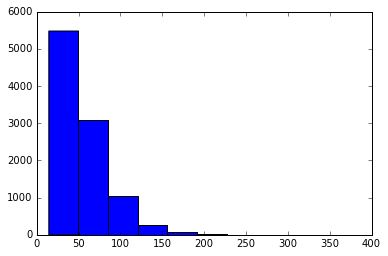

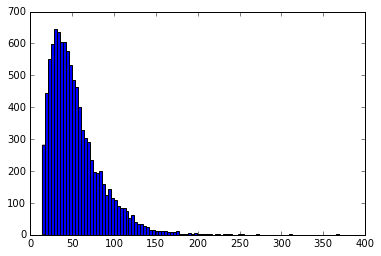

In [20]:
plt.hist(data['lepton_pt']);

#this means "Display current plot and start a NEW one"
plt.show()

#more bins
plt.hist(data['lepton_pt'],bins=100);


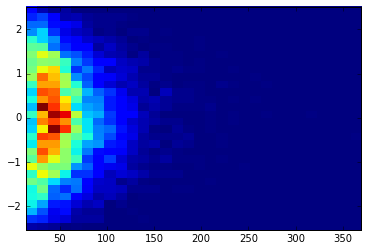

In [21]:
# 2d hist
x = data['lepton_pt']
y = data['lepton_eta']
plt.hist2d(x,y, bins=[30,30]);

# Do It Yourself

* Plot 3 histograms lepton_pt, lepton_phi and lepton_eta.
  * Histograms must be created at the same tab, and displayed on a different successive plots
* Finally, plot a 2d histogram of lepton_phi VS lepton_eta
  * Try 10x10, 100x100 and 1000x1000 bins







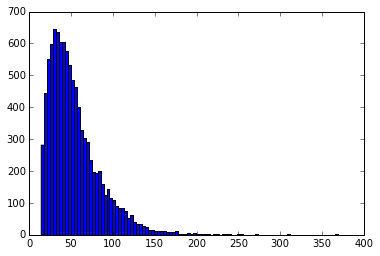

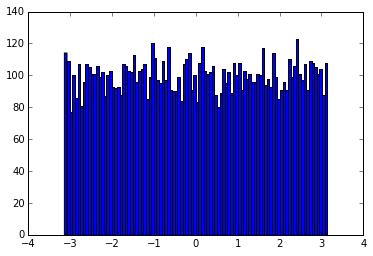

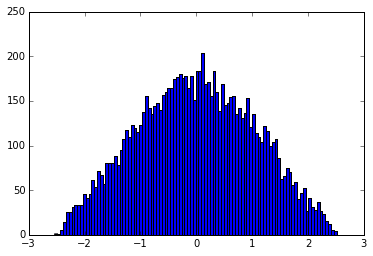

In [11]:
#1D histograms
pl1=plt.hist(data['lepton_pt'],bins=100);
plt.show()
pl2=plt.hist(data['lepton_phi'],bins=100);
plt.show()
pl3=plt.hist(data['lepton_eta'],bins=100);
plt.show()



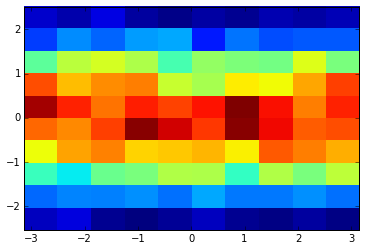

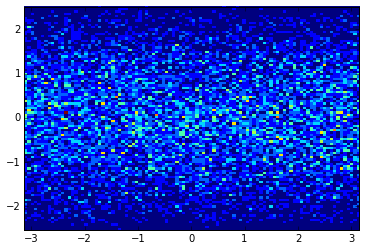

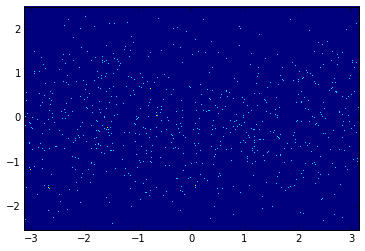

In [12]:
#2D histograms
# 2d hist
x = data['lepton_phi']
y = data['lepton_eta']
plt.hist2d(x,y, bins=[10,10]);
plt.show()
plt.hist2d(x,y, bins=[100,100]);
plt.show()
plt.hist2d(x,y, bins=[1000,1000]);
plt.show()
